<a href="https://colab.research.google.com/github/Ferperezm28/AccionesGoogle_Bedu/blob/main/Machine_Learning_Predicci%C3%B3n_de_precio_de_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Predicción de acciones con Ciencia de datos de la empresa Google

**Integrantes del Equipo:**


*   Estefania Ospina Cardona - fania0115@gmail.com
*   Fernanda Perez Martinez - a.ferp71@gmail.com
*   Paola Denisse Ortega Lara - paola04denisse@gmail.com
*   Vania Celeste Gudiño Mendez - gu399394@uaeh.edu.mx




**Introducción:**





Este análisis tiene como objetivo examinar la evolución de las acciones de Google en los últimos 15 años(2009-2024) con el propósito de identificar patrones y tendencias. A través de este estudio, buscamos construir un modelo de regresión lineal simple utilizando datos históricos para prever posibles movimientos futuros en el precio de las acciones.
Este análisis es crucial para inversores, gestores de fondos y analistas que buscan tomar decisiones informadas en el mercado financiero. Al comprender a fondo los factores que han influido en el rendimiento pasado de las acciones de Google, esperamos proporcionar información valiosa para la toma de decisiones estratégicas y la planificación financiera.

**Origen de los Datos:**

Los datos han sido extraídos de Yahoo Finance, una plataforma líder en información financiera. Se obtuvieron registros históricos de las acciones de Google en formato CSV facilitando su manipulación y análisis,  abarcando un período de los últimos 15 años hasta la fecha de extracción.

Recursos: [Yahoo Finance](https://finance.yahoo.com/)

**Identificar el problema**
* Se puede predecir el valor de las acciones con base en sus datos históricos y determinar la confiabilidad de la empresa, en base a esto.

Preguntas:
1. ¿Existe una periodicidad en el precio de las acciones? (encontrar patrones en alzas o baja de la acciones, presentes cada año en cierto período de tiempo -cada verano)
2. ¿El valor promedio al que cierra una acción es determinante en su valor futuro del próximo mes?
3. ¿Cómo ha cambiado el precio de las acciones a lo largo del tiempo?
4. ¿Cuándo se presentan más movimientos en las acciones? ¿Estos dependen del precio de las acciones?
5. ¿Cuál es el mejor día para invertir?
6. ¿Existe un período de tiempo más adecuado para invetir? por ejemplo donde el precio sea bajo y este solo crezca.
7. ¿Podemos identificar períodos de crisis o recesión de la empresa mediante el precio de sus acciones?
8. ¿Cuál sería el valor de las acciones en 5, 10 y 20 años, de acuerdo con los datos históricos?

# Dataset

Importación de paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestros datos

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Ferperezm28/AccionesGoogle_Bedu/main/Datasets/GOOGL.csv', sep=',')

*Informacion sobre el dataset*

In [ ]:
#Cantidad de datos
data.shape

(3774, 7)

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724
1,2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740
2,2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304
3,2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424
4,2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476


**Variables Disponibles:**

* Date: Representa la fecha en la que se registraron los datos de la acción.

* Open: Este valor indica el precio de apertura de la acción en el mercado en la fecha específica.

* High: El valor más alto que alcanzó la acción durante el día de negociación.

* Low: El valor más bajo que alcanzó la acción durante el día de negociación.

* Close: El precio de cierre de las acciones en el día.

* Adj Close (Adjusted Close): El precio de cierre ajustado por eventos corporativos como dividendos o divisiones de acciones.

* Volume: El volumen de acciones negociadas en el día.

In [ ]:
#Obtenemos más información sobre las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3774 non-null   object 
 1   Open       3774 non-null   float64
 2   High       3774 non-null   float64
 3   Low        3774 non-null   float64
 4   Close      3774 non-null   float64
 5   Adj Close  3774 non-null   float64
 6   Volume     3774 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 206.5+ KB


No tenemos valores nulos en nuestro dataset, por lo que no es necesario realizar una limpieza en el documento, dado que cada columna contiene los mismos 3774 valores y ninguno está vacío.

#Machine learning#

Dado que anteriormente ya hicimos un procesamiento y análisis de los datos, a partir de ahora vamos a implementar a nuestro proyecto Machine Learning con el fin de identificar patrones y tener respuestas a nuestras preguntas iniciales. Para esto necesitamos un conjunto de datos el cuál ya tenemos procesado, necesitamos elegir un modelo, particionar los datos y con estas entrenar, validar y probar el modelo para finalmente realizar nuestras predicciones.


**Definición del proyecto de Machine Learning:**

**Problema:** ¿Cuál es el mejor momento para comprar una acción?

**Datos:** Serán los que tenemos procesados desde el módulo anterior guardados en la variable 'data'.

**Selección del modelo y entrenamiento:** Vamos a implementar modelos de Machine Learning tanto como supervisados como no supervisados y según las medidas de error escoger el mejor.

**Validación y evaluación:** Este paso será realizado en cada uno de los modelos implementados.

---



In [ ]:
#Filtraremos los datos para usarlos en ciertos algoritmos que solo reciben datos numéricos
df_filtered = df_date.copy()
df_filtered = df_filtered.drop(columns=['Date','Porcentaje'])
print(df_filtered.shape)
df_filtered.head()

(3774, 9)


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,8.365616,8.633634,8.308308,8.522773,8.522773,208067724,2009,2,2
1,8.572823,8.583584,8.354104,8.519770,8.519770,261997740,2009,2,3
2,8.510260,8.869870,8.487738,8.583584,8.583584,272423304,2009,2,4
3,8.531281,8.893393,8.433433,8.851852,8.851852,290285424,2009,2,5
4,8.920420,9.354605,8.894895,9.291291,9.291291,281242476,2009,2,6


**Separación de datos**

Este es un paso crucial que implica dividir el conjunto de datos disponible en 3 conjuntos separados para entrenamiento, validación y prueba, esta partición se realiza para evaluar el rendimiento del modelo de manera objetiva y para evitar problemas como el sobreajuste.

Vamos a hacer la separación en tres conjuntos:
*   Conjunto de entrenamiento (Training set): este se utiliza para entrenar nuestro modelo de ML, el modelo va a ajustar sus parámetros según estos datos para poder aprender patrones y relaciones entre las variables predictoras y las de salida, por lo general este conjunto de datos representa alrededor de un 70-80% del conjunto de datos total.
*   Conjunto de validación (Validation set): este se utiliza para ajustar los hiperparámetros del modelo y evitar el sobreajuste. Este es un paso que no vemos realmente pero consiste en que en cada iteración de entrenamiento se evalúa el rendimiento del modelo en este conjutno de datos para tomar decisiones sobre cómo modificar el modelo hasta que este sea adecuado. El tamaño de este conjunto suele ser del 10-15% del conjunto de datos total.
*   Conjunto de pruebas (Test set): este se utlizar para evaluar el rendimiento final del modelo después del entrenamiento y la validación, para que sea una evaluación imparcial el modelo nunca debería haber visto estos datos durante el entrenamiento o la validación, el rendimiento del modelo en este conjunto de datos proporciona una estimación objetiva de cómo se desempeñará en datos nuevos y no vistos en el mundo real. El tamaño de este conjunto suele ser del 10-15% del conjunto de datos total.

La partición de datos suele realizarse de manera aleatoria, asegurándose de que las distribuciones de las características y las etiquetas sean similares en cada conjunto. Pero si esta partición de datos no se maneja de forma adecuada podría representar problemas tales como:

*   Sobreajuste al conjunto de validación: el rendimiento del modelo en datos nuevos podría ser sobreestimado o subestimado.
*   Sobreajuste al conjunto de pruebas: esto puede ocurrir si se realizan múltiples iteraciones de ajuste del modelo y evaluación utilizando el conjunto de prueba.
*   Falta de representatividad: si los conjuntos de entrenamiento, validación y prueba no representan adecuadamente la distribución de los datos reales, el rendimiento del modelo en datos nuevos puede ser subestimado o sobreestimado.
*   Poca cantidad de datos de entrenamiento: si la cantidad de datos de entrenamiento es insuficiente en relación con la complejidad del modelo, el modelo puede no generalizar bien a datos nuevos y puede ser propenso al sobreajuste.
*   Fugas de datos (o Data leakage): Si hay filtración de información del conjunto de prueba al conjunto de entrenamiento o validación, esto puede sesgar artificialmente el rendimiento del modelo.
*   Desequilibrio de clases: Si hay desequilibrios significativos en la distribución de clases entre los conjuntos de entrenamiento, validación y prueba, el rendimiento del modelo puede verse afectado, especialmente en problemas de clasificación.
*   Series temporales: En problemas con datos temporales, **como es nuestro caso**, es importante realizar la partición de datos de manera que los conjuntos de entrenamiento, validación y prueba reflejen adecuadamente la naturaleza temporal de los datos para evitar la contaminación de información futura en los conjuntos de entrenamiento y validación.






Cómo se mencionó anteriormente en los posibles problemas derivados de la partición de datos debemos tener muy en cuenta que nuestros datos son temporales lo que significa que los datos de momentos posteriores son inheremente diferentes de los datos recopilados en momentos anteriores asi que la partición de nuestros datos debe reflejar esta naturaleza temporal para evitar problemas, entonces para realizar nuestra partición podríamos hacer una partición basada en el tiempo, evitar fugas de datos y/o usar validación cruzada temporal.

In [ ]:
#Partición en entrenamiento y prueba
def train_test(entradas,salidas,test_size,random):
  x_train, x_test, y_train, y_test = train_test_split(entradas, salidas, test_size =test_size, random_state=random)
  return x_train, x_test, y_train, y_test

In [ ]:
#Particionar con validación cruzada
def k_fold(K,aleatorio,random_seed):
  kfold = KFold(n_splits= K, shuffle=aleatorio, random_state=random_seed)
  return kfold

**Entrenamiento** K-means

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
#Librerias de ML
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

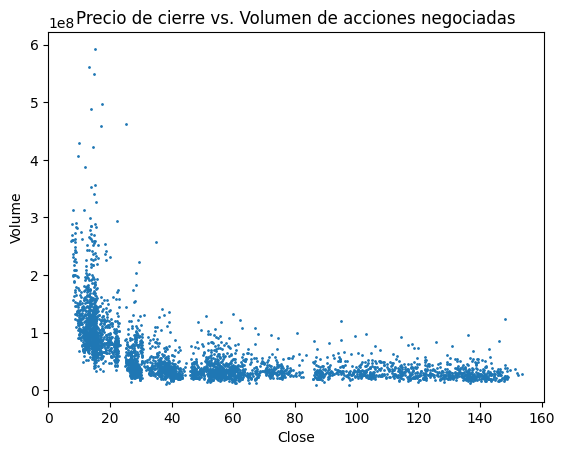

In [ ]:
#Visualización de datos
x = data['Close'].values
y = data['Volume'].values
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Precio de cierre vs. Volumen de acciones negociadas')
plt.plot(x,y,'o',markersize=1)

Parece indicar que a mayor volumen menor es el precio de cierre.

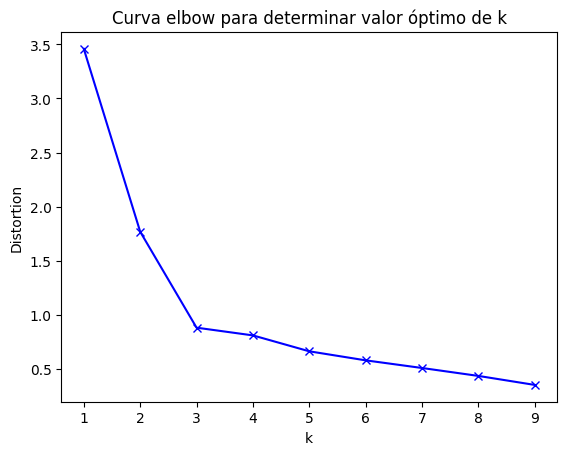

In [ ]:
#Curva elbow para determinar valor óptimo de k.

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Curva elbow para determinar valor óptimo de k')
plt.show()




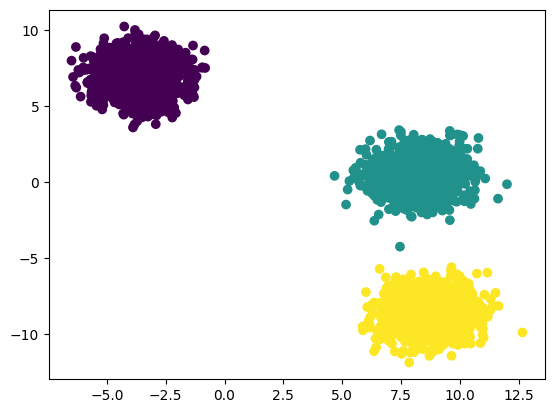

In [ ]:
x, y = make_blobs(n_samples=3774, centers=3, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [ ]:
K = 3
#Dividimos entre train y test.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = K).fit(x_train)
#Extraemos los centroides
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[ 8.75748353 -8.57167569]
 [-3.60825632  6.97577365]
 [ 8.20939653  0.4986684 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Árboles de decisión**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Crear variable y respuesta
X = data['Open'].values.reshape(-1,1)
y = data['Close'].values

In [ ]:
# Ajustar el Modelo
from sklearn.ensemble import RandomForestRegressor as Bosque
regresor = Bosque(n_estimators=10, random_state=0)
regresor.fit(X, y.reshape(-1,))

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
#Hacer las predicciones (predicciones -> y_pred)
y_fit = regresor.predict(X).reshape(-1,1) # Valores ajustados durante el entrenamiento

<ipython-input-106-964eecaae904>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


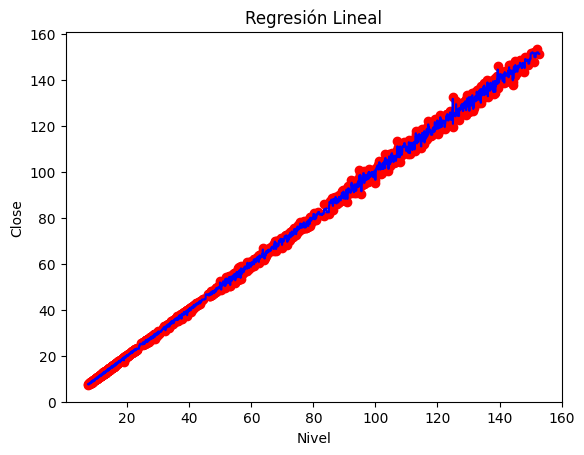

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(-1, 1)
y_grid = regresor.predict(X_grid)

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_grid, color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Close')
plt.show()

**Regresión Lineal Múltiple**

In [ ]:
import numpy as np
import pandas as pd
#Librerias de ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Vamos a predecir el valor de **Close**, por lo que comenzaremos utilizando solo las variables que nos indican una correlacion 1

In [ ]:
#Creamos las variables predictorias y la varaible predecida
x_rlm = df_filtered[['Open','High','Low','Adj Close']]
y_rlm = df_filtered['Close']

In [ ]:
#dividir los datos en Train y Test
X_train, X_test, Y_train, Y_test = train_test(x_rlm, y_rlm, 0.4,5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#Entrenamiento de regresión lineal
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
#Evaluar el modelo
#Datos de entrenamiento
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
#Datos de prueba
y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

In [ ]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

**Bitacora de Experimento**

* *Experimento 1*
* Fecha y hora: 16-03-2024
* Algoritmo: Regresion Lineal
* Dataset: GOOG.csv
* Configuración:
  * Algoritmo LinealRegression
  * Learning: 0.4 test
  * Random state: 5
* Resultado
  * MSE entrenamient: 1.1303230414759601e-27
  * MSE Prueba: 1.139861691664678e-27

*Regresion lineal multiple con todas las variables*

In [ ]:
#Creamos las variables predictoras y la variable a predecir
X_rlm = df_filtered[['Open','High','Low','Adj Close','Volume','Year']]
Y_rlm = df_filtered['Close']

In [ ]:
#Dividir los datos en Train y Test
X_train, X_test, Y_train, Y_test = train_test(X_rlm, Y_rlm, 0.4,5)
#Entrenamiento de regresión lineal
lin_model_com = LinearRegression()
lin_model_com.fit(X_train, Y_train)

In [ ]:
#Evaluar el modelo
#Datos de entrenamiento
y_train_predict = lin_model_com.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
#Datos de prueba
y_test_predict = lin_model_com.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

In [ ]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

**Bitacora de Experimento**

* *Experimento Com 2*
* Fecha y hora: 16-03-2024
* Algoritmo: Regresion Lineal
* Dataset: GOOG.csv
* Configuración:
  * Algoritmo LinealRegression
  * Learning: 0.4 test
  * Random state: 5
* Resultado
  * MSE entrenamient: 9.550704673873392e-21
  * MSE Prueba: 1.0189304589022624e-20

**Regresion Polinomial**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_rpm = df_filtered[['Open','High','Low','Adj Close','Volume','Year']]
Y_rpm = df_filtered['Close']

In [ ]:
#Dividir los datos en Train y Test
X_train, X_test, Y_train, Y_test = train_test(X_rpm, Y_rpm, 0.4,5)
#Construir el modelo de regresion
poly_model = LinearRegression()

In [ ]:
#Asignamos el grado del polinomio
poly = PolynomialFeatures(degree=2)

#Convertimos los datos a relaciones polinómicas
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

#Entrenamos el modelo
poly_model.fit(Xpolytrain, Y_train)


In [ ]:
## Evaluamos el modelo
#Predecimos los resultados de entrenamiento
y_train_predict = poly_model.predict(Xpolytrain)
#Error cuadrático medio
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

#Predecimos los resultados de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

**Bitacora de Experimento**

* *Experimento Com 3*
* Fecha y hora: 16-03-2024
* Algoritmo: Regresion Polinomial grado 2
* Dataset: GOOG.csv
* Configuración:
  * Algoritmo LinealRegression degree 2
  * Learning: 0.4 test
  * Random state: 5
* Resultado
  * MSE entrenamient: 0.0005772693148451213
  * MSE Prueba: 0.0006280399129507416

**Bitacora de Experimento**

* *Experimento Com 4*
* Fecha y hora: 16-03-2024
* Algoritmo: Regresion Polinomial grado 3
* Dataset: GOOG.csv
* Configuración:
  * Algoritmo LinealRegression degree 3
  * Learning: 0.4 test
  * Random state: 5
* Resultado
  * MSE entrenamient: 104.46908439418338
  * MSE Prueba: 167.24536508000529

**Series de tiempo**

Las series de tiempo son una aplicación de la regresión: una serie temporal es una secuencia de datos ordenados cronológicamente, donde cada punto de datos está asociado con un momento específico en el tiempo. Estos datos pueden representar cualquier variable que cambie a lo largo del tiempo, como ventas trimestrales, temperaturas diarias, precios de acciones, entre otros. El análisis de series temporales se centra en entender los patrones, tendencias y ciclos en los datos a lo largo del tiempo, y se utiliza en una variedad de campos para predecir el comportamiento futuro.

Notemos que nuestros datos son registros que se toman de manera cronológica diariamente. Esto nos permitirá realizar predicciones con respecto a fechas. Algo muy importante a tener en cuenta es que acá no es que exista una dependencia directa hacia la fecha sino hacia los datos anteriores.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#Fijamos la fecha como índice
data.set_index('Date', inplace=True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Porcentaje,Year,Month,Day
Date,,,,,,,,,,
2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724,0.018786,2009,2,2
2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740,-0.006189,2009,2,3
2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304,0.008616,2009,2,4
2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424,0.037576,2009,2,5
2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476,0.041576,2009,2,6


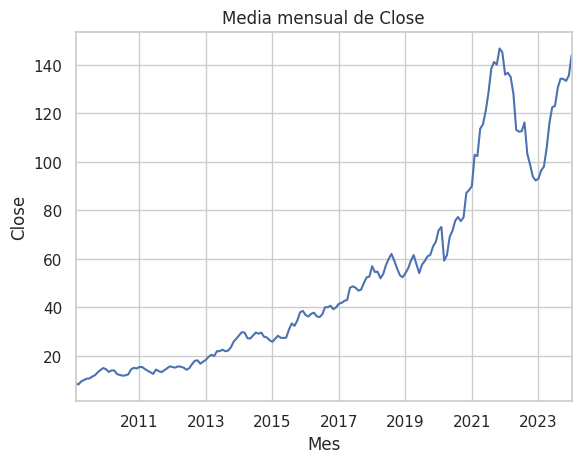

In [ ]:
 # Calcular la media mensual de los precios de cierre
monthly_mean = data['Close'].resample('1M').mean()
monthly_mean.plot(y='Close', title='Media mensual de Close')
plt.xlabel('Mes')
plt.ylabel('Close')
plt.show()


Notemos que a pesar de que hay subidas y bajadas a largo plazo se observa una tendencia a que la variable Close siempre crezca.

**Red Neuronal**

El objetivo principal de este tema de Redes neuronales es construir un modelo predictivo capaz de prever el comportamiento futuro del precio de las acciones de Google con una precisión significativa. Esto proporcionará a los inversores y analistas una herramienta valiosa para tomar decisiones informadas sobre la compra, venta o retención de acciones de Google.

In [ ]:
#Importamos las librerías correspondientes:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-02-02,8.365616,8.633634,8.308308,8.522773,8.522773,208067724
1,2009-02-03,8.572823,8.583584,8.354104,8.519770,8.519770,261997740
2,2009-02-04,8.510260,8.869870,8.487738,8.583584,8.583584,272423304
3,2009-02-05,8.531281,8.893393,8.433433,8.851852,8.851852,290285424
4,2009-02-06,8.920420,9.354605,8.894895,9.291291,9.291291,281242476
5,2009-02-09,9.291291,9.534535,9.191692,9.478729,9.478729,198892908
6,2009-02-10,9.408909,9.446947,8.956206,8.971722,8.971722,283863852
7,2009-02-11,8.982733,9.134134,8.833834,8.959960,8.959960,209054736
8,2009-02-12,8.837838,9.099600,8.795796,9.085335,9.085335,221789988
9,2009-02-13,9.063814,9.083834,8.889640,8.950951,8.950951,165702132


In [ ]:
max_values = data_copy.max()
min_values = data_copy.min()


In [ ]:
print("Valor máximo de cada columna:")
print(max_values)

print("\nValor mínimo de cada columna:")
print(min_values)

Valor máximo de cada columna:
Date         2024-01-30
Open         152.800003
High         153.779999
Low          151.429993
Close        153.509995
Adj Close    153.509995
Volume        592399008
dtype: object

Valor mínimo de cada columna:
Date         2009-02-02
Open           7.463714
High           7.671922
Low            7.243493
Close           7.27953
Adj Close       7.27953
Volume          9312000
dtype: object


In [ ]:
# Aplicar pd.cut a la columna 'Close' para crear la categoría
data_copy['Close_Category'] = pd.cut(data_copy['Close'], bins=3, labels=['Low', 'Medium', 'High'])

# Convertir 'Close_Category' a tipo categórico
data_copy['Close_Category'] = data_copy['Close_Category'].astype('category')

# Dividir los datos en características (X) y la variable objetivo (y)
X = data_copy[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data_copy['Close_Category'].values

**Significado de las Clases:** Hemos dividido la columna 'Close' en tres categorías ('Low', 'Medium', 'High'):
* Low (Bajo): Representa valores de cierre considerados bajos en comparación con
el rango total de valores de cierre.
* Medium (Medio): Representa valores de cierre que están en un rango intermedio en comparación con el rango total de valores de cierre.
* High (Alto): Representa valores de cierre considerados altos en comparación con el rango total de valores de cierre.

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
# Creamos y entrenamos el modelo de red neuronal
redNeuronal = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, activation='relu', alpha=0.001, random_state=42)
redNeuronal.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,), random_state=42)

In [ ]:
# Realizamos predicciones en el conjunto de prueba
y_pred = redNeuronal.predict(X_test_scaled)

In [ ]:
# Evaluamos el modelo utilizando la matriz de confusión y la precisión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion matrix:
 [[217   0   6]
 [  0 984   3]
 [  3   6 291]]
Accuracy: 0.9880794701986755


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

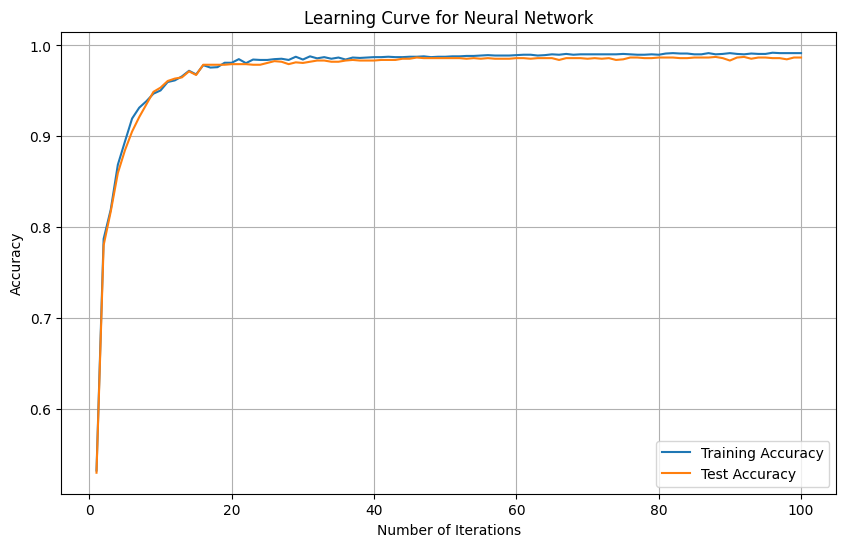

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Definir el rango de iteraciones
max_iterations = 100
iterations = np.arange(1, max_iterations + 1)

# Listas para almacenar la precisión en el conjunto de entrenamiento y prueba
train_accuracy = []
test_accuracy = []

# Entrenamiento de la red neuronal para diferentes números de iteraciones
for i in iterations:
    redNeuronal = MLPClassifier(hidden_layer_sizes=(100,), max_iter=i, activation='relu', random_state=42)
    redNeuronal.fit(X_train_scaled, y_train)

    # Predicción en el conjunto de entrenamiento
    y_train_pred = redNeuronal.predict(X_train_scaled)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

    # Predicción en el conjunto de prueba
    y_test_pred = redNeuronal.predict(X_test_scaled)
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Graficar la precisión en función del número de iteraciones
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracy, label='Training Accuracy')
plt.plot(iterations, test_accuracy, label='Test Accuracy')
plt.title('Learning Curve for Neural Network')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


 El gráfico muestra que el modelo tiene un alto rendimiento tanto en los datos de entrenamiento como en los de prueba. Sin embargo, la pequeña brecha entre las curvas de precisión del entrenamiento y de la prueba podría indicar un cierto grado de sobreajuste.

In [ ]:
#Segundo intento
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
data['Close_Category'] = pd.cut(data['Close'], bins=3, labels=['Low', 'Medium', 'High'])
data['Close_Category'] = data['Close_Category'].astype('category')

X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close_Category'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

redNeuronal = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', random_state=42)

# Aplicamos validación cruzada
cv_scores = cross_val_score(redNeuronal, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Accuracy:", cv_scores.mean())

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
redNeuronal.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = redNeuronal.predict(X_test)

# Evaluamos el modelo utilizando la matriz de confusión y la precisión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-Validation Scores: [0.97350993 0.99470199 0.9986755  0.98278146 0.58753316]
Accuracy: 0.9074404061341719
Confusion matrix:
 [[217   0   6]
 [  0 984   3]
 [  3   6 291]]
Accuracy: 0.9880794701986755


**Bitacora**

*Prueba 1*

Algoritmo: MLPClassifier

Parametros:
  * hidden_layer_sizes=(100, 10),
  * activation='relu',
  * solver='adam',
  * max_iter=1000

Resultados:
  * tiempo: 9s
  * MSE: 0.06348168448527679

*Red neuronal de Regresion*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df_filtered.head()

In [ ]:
#definimos las variables
X_rn = df_filtered[['Year','Open','High','Low','Adj Close','Volume']]
Y_rn = df_filtered['Close']

In [ ]:
# Normalizar las variables
scaler = StandardScaler()
X = scaler.fit_transform(X_rn)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y_rn, test_size=0.25)

In [ ]:
# Definir la arquitectura de la red neuronal
model = MLPRegressor(hidden_layer_sizes=(10, 4), activation='relu', solver='lbfgs', max_iter=1000)

# Entrenar la red neuronal
model.fit(X_train, y_train)

In [ ]:
# Predecir el precio de cierre para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Imprimir el error
print("Error cuadrático medio:", mse)

**Bitacora**

*Prueba 1*

Algoritmo: MLPRegressor

Parametros:
  * hidden_layer_sizes=(10, 10),
  * activation='relu',
  * solver='adam',
  * max_iter=1000

Resultados:
  * tiempo: 9s
  * MSE: 0.06348168448527679

**Bitacora**

*Prueba 2*

Algoritmo: MLPRegressor

Parametros:
  * hidden_layer_sizes=(10, 4),
  * activation='relu',
  * solver='adam',
  * max_iter=1000

Resultados:
  * tiempo: 8s
  * MSE: 0.04941554986182121

**Bitacora**

*Prueba 3*

Algoritmo: MLPRegressor

Parametros:
  * hidden_layer_sizes=(10, 4),
  * activation='tanh',
  * solver='adam',
  * max_iter=1000

Resultados:
  * tiempo: 9s
  * MSE: 586.0327375761971

**Bitacora**

*Prueba 4*

Algoritmo: MLPRegressor

Parametros:
  * hidden_layer_sizes=(10, 4),
  * activation='relu',
  * solver='sgd',
  * max_iter=1000

Resultados:
  * tiempo: 2s
  * MSE: 0.06393763922976899

**Bitacora**

*Prueba 5*

Algoritmo: MLPRegressor

Parametros:
  * hidden_layer_sizes=(10, 4),
  * activation='relu',
  * solver='lbfgs',
  * max_iter=1000

Resultados:
  * tiempo: 3s
  * MSE: 8.270308841647225e-06

**Conclusiones:**
Después de meses de arduo trabajo, hemos concluido nuestro proyecto de predicción de las acciones de Google  de los años (2009-2024) utilizando técnicas de Procesamiento de Datos y Análisis de Datos con Python y Machine Learning. Durante este tiempo, hemos adquirido una comprensión profunda de los conceptos fundamentales de la ciencia de datos y hemos aplicado estas habilidades para abordar un problema real y desafiante en el mundo financiero.

A lo largo del proyecto, aprendimos a limpiar y procesar datos, explorar características relevantes, y seleccionar y entrenar modelos de Machine Learning. También ganamos experiencia en la evaluación de modelos, utilizando herramientas para comprender el rendimiento del modelo y tomar decisiones informadas sobre ajustes adicionales.

Nuestro análisis nos ha permitido no solo predecir con precisión los precios de las acciones de Google, sino también comprender mejor el proceso de desarrollo de modelos de Machine Learning y sus implicaciones en el mundo real.
Este proyecto nos ha brindado una valiosa experiencia y nos ha preparado para enfrentar desafíos aún mayores en nuestro viaje como futuras analistas de datos.